<a href="https://colab.research.google.com/github/goldenfingaz/my_projects/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Python
In this activity, we will be exploring a CRM dataset to extract business intelligence insights for decision-making. Specifically, our goal is to determine which groups of customers in our data set are most likely to respond positively to a survey. We will however explore other variables within the dataset.Python will be used alongside four of its libraries, Numpy for numerical analysis, Pandas for exploring information in tabular form (dataframes) and the last two, Matplotlib and Seaborn for visualizing our data. 

Lets get started!

# 1. Importing our libraries

In [1]:
#Lets's start off by importing the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#this will ensure that...
%matplotlib inline

# 2. Loading our dataset
The dataset we'll be working with is stored in my github repository and should easily be accessible by entering the link as the first argument in the read_csv() method.

In [2]:
# Load the dataset using pandas
df = pd.read_csv("https://raw.githubusercontent.com/goldenfingaz/Datasets/master/CRM_Data.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Viewing our dataframe

Here we use the .head() method to check the first five rows of the dataframe. We will also call the .shape attribute to display the number of rows and columns in the dataset. 

In [3]:
df.head()


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
df.shape

(45213, 19)

# 4. Cleaning our data
From the output, it is clear that the data needs some cleaning. The following are some of the issues we will be fixing:
    1. The column headers comprising the first two rows need fixing.
    2. Some columns are unnecessary and should be deleted.
    3. Some columns will require splitting up.
    4. There may be missing values in the dataset that need to be dealt with.

## 4.1 Fixing columns

In [5]:
#reload the dataset, but skip the first two rows by setting the skiprow argument to 2.
df = pd.read_csv("https://raw.githubusercontent.com/goldenfingaz/Datasets/master/CRM_Data.csv",skiprows=2)

In [6]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


This makes more sense now. Let's continue cleaning our data. The column "customerid" is not important for our exploration and should be deleted. We will use the .drop() method and set the inplace argument to True to make the change permanent.

In [7]:
df.drop("customerid",axis=1,inplace=True)

In [8]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## 4.2 Creating new columns

The "customerid" column is gone now. Further exploring our dataframe, you would probably have noticed that the jobedu column contains two pieces of information, job and education respectively. We're going to create separate columns for each using a lambda expression.

In [9]:
df["job"] = df["jobedu"].apply(lambda x:x.split(",")[0])
df["education"] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [10]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## 4.3 Deleting columns
Great. We now have seperate "job" and "education" columns. We only need to delete the "jobedu" column to complete this mini-task.

In [11]:
df.drop("jobedu",axis=1,inplace=True)

In [12]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## 4.4 Dealing with missing values
Now, lets check to see if the dataset has missing values. Missing values can interfere with our work. While some functions may be able to overlook them, others won't. In this next exercise, we will determine if the dataset has any missing values, and if so where?

In [23]:
df.isna()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isna().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

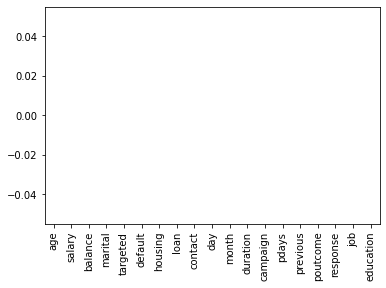

In [33]:
df.isna().sum().plot(kind="bar")
plt.show()

We now have an idea what data is missing and where. Typically, we have two options: delete rows that contain missing data or replace them with a value. In our case, deleting that many rows may affect our analysis, we will replace the values instead. 

Let's begin with "age" column. Here we can remove all rows with missing data since it will not significantly affect our analysis.

In [34]:
df = df[~df.age.isnull()].copy()

In [35]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Now let's move on to the month column. We can replace missing values with the most common value in the month column, the mode. Let's find the mode first.

In [36]:
df.month.mode()[0]

'may, 2017'

Next, we use the fillna() function to specify which values to use.

In [37]:
df.month.fillna(df.month.mode()[0],inplace=True)

Let's check to see if our month column still has null values.

In [38]:
df.month.isnull().sum()

0

Zero null values. Good. Now we will proceed to the "response" column. Imputing new values for missing data in this section will remove all rows with missing values in the "response" column will affect our analysis. We will remove all rows with missing data in the "response" column instead.

In [39]:
df = df[~df.response.isnull()].copy()

In [40]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## 4.5 Handling outliers in the data
Outliers are values in the dataset that deviate too much from the nearest data points. Outliers may be univariate, meaning composed of one variable, or multivariate which is the result of plotting two data points. We can deal with outliers in several ways. We can drop them, impute new values of just ignore them but it's important to understand how they came to be. More on outliers later. For now, let's begin the task of analyzing our data.

# 5. Univariate Analysis
When we analyze data within a single column or variable, it is called univariate analysis. There are several different kinds of univariate analyses depending on the kind of data.

## 5.1 Categorical unordered univariate analysis
This type of data has no order or ranking, and is categorical as opposed to numerical. Our "jobs" column contains sub-categories that describe different job types. Lets plot the information in this column.

In [41]:
#the value_counts function will give us the sum of each unique category.
df['job'].value_counts()

blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: job, dtype: int64

In [44]:
#setting the normalize argument to true should give us the percentage representations.
df['job'].value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

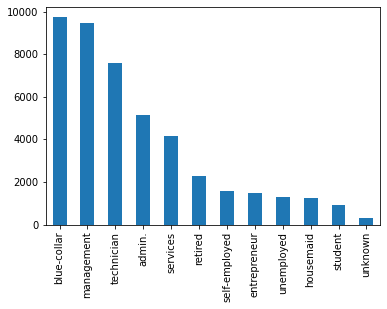

In [45]:
df['job'].value_counts().plot(kind='bar')

From the bar chart, it is easy to see that blue collar workers outnumber all other jobs.

## 5.2 Categorical ordered univariate analysis
Categorical ordered data have a natural rank and progression. Examples from our dataset includes "education" and "month". Let's explore the education variable using a pie chart.

In [46]:
df["education"].value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

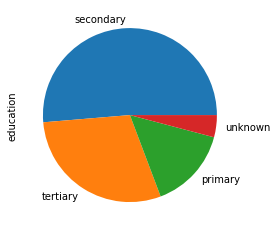

In [47]:
df["education"].value_counts(normalize=True).plot(kind="pie")

## 5.3 Numeric Univariate Analysis
Univariate numeric data is usually analyzed by calculating functions like the mean, mode, max, min, standard deviation etc. We can easily achieve this by using the describe method. Let's try this on the "salary" column.

In [48]:
df['salary'].describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

# 6. Bivariate Analysis
Bivariate analysis involves two different columns or variables in a dataset. A bivariate analysis could take one of three different forms: numeric-numeric, numeric-categorical and categorical-categorical. Lets start with numeric-numeric

## 6.1 Numeric-Numeric 
Scatter Plots are a common way to compare two numeric variables, but we could also use a Pair Plot or a Correlation Matrix.

## Scatter Plot

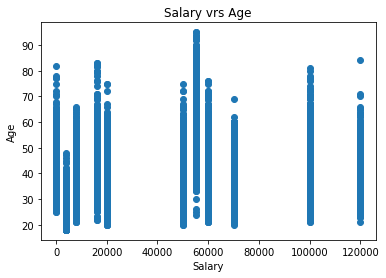

In [49]:
#Salary and age
plt.scatter(df["salary"],df["age"])
plt.title("Salary vrs Age")
plt.ylabel("Age")
plt.xlabel("Salary")
plt.show()

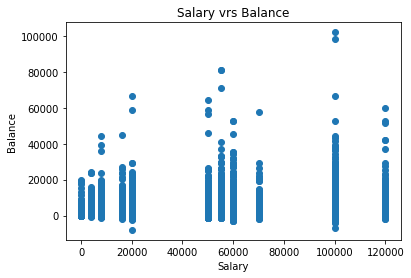

In [50]:
#Salary and Balance
plt.scatter(df["salary"],df["balance"])
plt.title("Salary vrs Balance")
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.show()

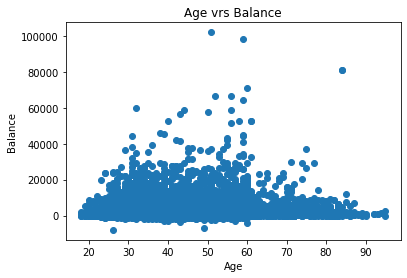

In [51]:
plt.scatter(df["age"],df["balance"])
plt.title("Age vrs Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

## Pair Plots

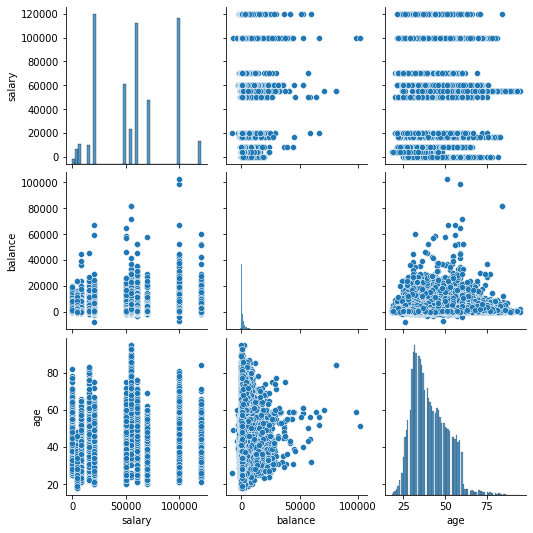

In [52]:
sns.pairplot(data=df,vars=["salary","balance","age"])
plt.show()

## Correlation Matrix
A correlation matrix is useful for identifying the relationship between several variables. We will begin by creating a matrix using the salary, balance and age variables, and then plot a heatmap.

In [53]:
df[["balance","age","salary"]].corr()

,balance,age,salary
balance,1.000000,0.097710,0.055489
age,0.097710,1.000000,0.024513
salary,0.055489,0.024513,1.000000


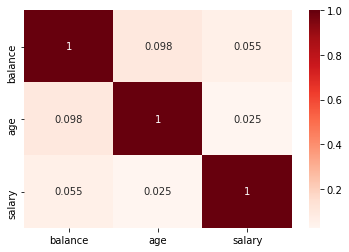

In [54]:
sns.heatmap(df[['balance','age','salary']].corr(),annot=True,cmap='Reds')
plt.show()

## 6.2 Numeric - Categorical
Here, we analyze data using one set of numeric variables and another set of categorical variables. Analysis can be done using the mean, median and box plots to show dispersion.

In [55]:
# First let's look at the mean.
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [56]:
# Now let's check the median
df.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

There isn't much difference between 'yes' and 'no' as far as the mean and median is concerned. A box plot may tell a different story.

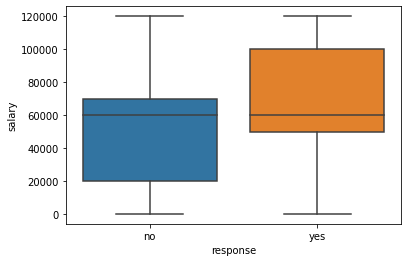

In [57]:
sns.boxplot(x=df['response'], y=df['salary'])
plt.show()

The results clearly show a higher IQR (Inter-Quartile Range) for customers who responded 'yes', than for customers who responded 'no'.

## Categorical - Categorical
Next, we will explore how the response rate relates to categories like marital status, education etc. But first, we will convert responses from "Yes" and "No" to 1s and 0s respectively. This will allow us to determine the response rate.

In [58]:
df['response_rate'] = np.where(df['response']=='yes',1,0)

In [59]:
df['response_rate'].value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

Now let's check how response_rate is distributed between the different categories of marital status.

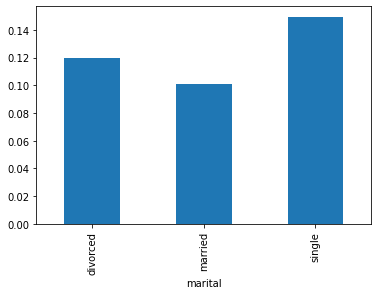

In [60]:
df.groupby('marital')['response_rate'].mean().plot(kind='bar')
plt.show()

From the above output, it is clear that single people are more likely to respond positively to a survey. We can do the same for other variables like 'loan', 'housing loans' etc.

# 7. Multivariate Analysis
This comprises data analysis involving more than two different variables. A common type of multivariate analysis is the heatmap. We can easily check the relationship between variables in our data set like 'education', 'marital' and 'response_rate'. But first, we will create a pivot table.

In [61]:
results = pd.pivot_table(data=df,index='education',columns='marital',values='response_rate')
print(results)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


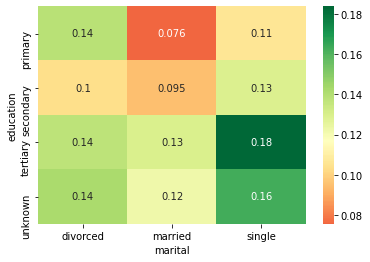

In [62]:
sns.heatmap(results,annot=True,cmap='RdYlGn', center=0.117)
plt.show()

# Conclusion
From the heatmap, we can conclude that single people with tertiary education are much more likely to respond positively to surveys, while married people with primary education are the least likely group to respond positively to a survey.
